<a href="https://colab.research.google.com/github/omakaroshka/Makarevich-OV/blob/main/VKR_Makarevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Data extraction - загружаем датасет из его исходных файлов

In [ ]:
!gdown --id  13doXNoMdGW0YTnL_3Hm9i1TEcNVDy789
!gdown --id 1jmX6-DneQT6ogtOWEmLdKMRzU_MN1AJP

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13doXNoMdGW0YTnL_3Hm9i1TEcNVDy789
To: /content/X_bp.xlsx
100% 139k/139k [00:00<00:00, 73.5MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jmX6-DneQT6ogtOWEmLdKMRzU_MN1AJP
To: /content/X_nup.xlsx
100% 42.4k/42.4k [00:00<00:00, 38.1MB/s]


In [ ]:
X_nup = pd.read_excel('X_nup.xlsx')
X_nup.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1040.0,519.500000,300.366443,0.0,259.750000,519.500000,779.250000,1039.000000
"Угол нашивки, град",1040.0,45.000000,45.021650,0.0,0.000000,45.000000,90.000000,90.000000
Шаг нашивки,1040.0,6.911385,2.555181,0.0,5.102256,6.938000,8.587662,14.440522
Плотность нашивки,1040.0,57.248399,12.332438,0.0,49.970740,57.413594,65.107235,103.988901


In [ ]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


первый датасет имеем 4 колонки и 1040 значений. пропуски данных отсутствуют. Значения только колчественные.

In [ ]:
X_bp = pd.read_excel('X_bp.xlsx')
X_bp.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1023.0,511.000000,295.458965,0.000000,255.500000,511.000000,766.500000,1022.000000
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732


In [ ]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

второй датасет имеет 11 колонок, пропуски данных отсутствуют, данные только количественные.

In [ ]:
# объеденим датасеты согласно ТЗ. Объединение делать по индексу тип объединения INNER
df = X_nup.merge(X_bp, how='inner', left_index = True, right_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0_x                          1023 non-null   int64  
 1   Угол нашивки, град                    1023 non-null   int64  
 2   Шаг нашивки                           1023 non-null   float64
 3   Плотность нашивки                     1023 non-null   float64
 4   Unnamed: 0_y                          1023 non-null   int64  
 5   Соотношение матрица-наполнитель       1023 non-null   float64
 6   Плотность, кг/м3                      1023 non-null   float64
 7   модуль упругости, ГПа                 1023 non-null   float64
 8   Количество отвердителя, м.%           1023 non-null   float64
 9   Содержание эпоксидных групп,%_2       1023 non-null   float64
 10  Температура вспышки, С_2              1023 non-null   float64
 11  Поверхностная пло

In [ ]:
df['Unnamed: 0_x', 'Unnamed: 0_y']

KeyError: ignored

In [ ]:
df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,0,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,90,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,90,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,90,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,90,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


# графический и неграфический анализ

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",1023.0,44.252199,45.015793,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,1023.0,6.899222,2.563467,0.000000,5.080033,6.916144,8.586293,14.440522
Плотность нашивки,1023.0,57.153929,12.350969,0.000000,49.799212,57.341920,64.944961,103.988901
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362


In [ ]:
df['Угол нашивки, град'].unique()

array([ 0, 90])

In [ ]:
#посчитаем уникальные значения с помощью функции nunique по всем столбцам
df.nunique()

Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки                               2
dtype: int64

In [ ]:
df['Угол нашивки, град'].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

колонка угол нашивки содержит только 2 значения.

In [ ]:
# ручное кодирование угла нашивки, с записью в новый столбец угол нашивки.
c={0:0, 90:1} # ручное кодирование
df['Угол нашивки'] = df['Угол нашивки, град'].map(c)

In [ ]:
df['Угол нашивки'].value_counts()

0    520
1    503
Name: Угол нашивки, dtype: int64

In [ ]:
dfnew=df[['Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки']]
dfnew

,Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки
0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0
1,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0
2,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0
3,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0
4,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1
1019,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1
1020,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1
1021,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1


In [ ]:
#гистограммы распределения
dfnew.columns

Index(['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2', 'Угол нашивки'],
      dtype='object')

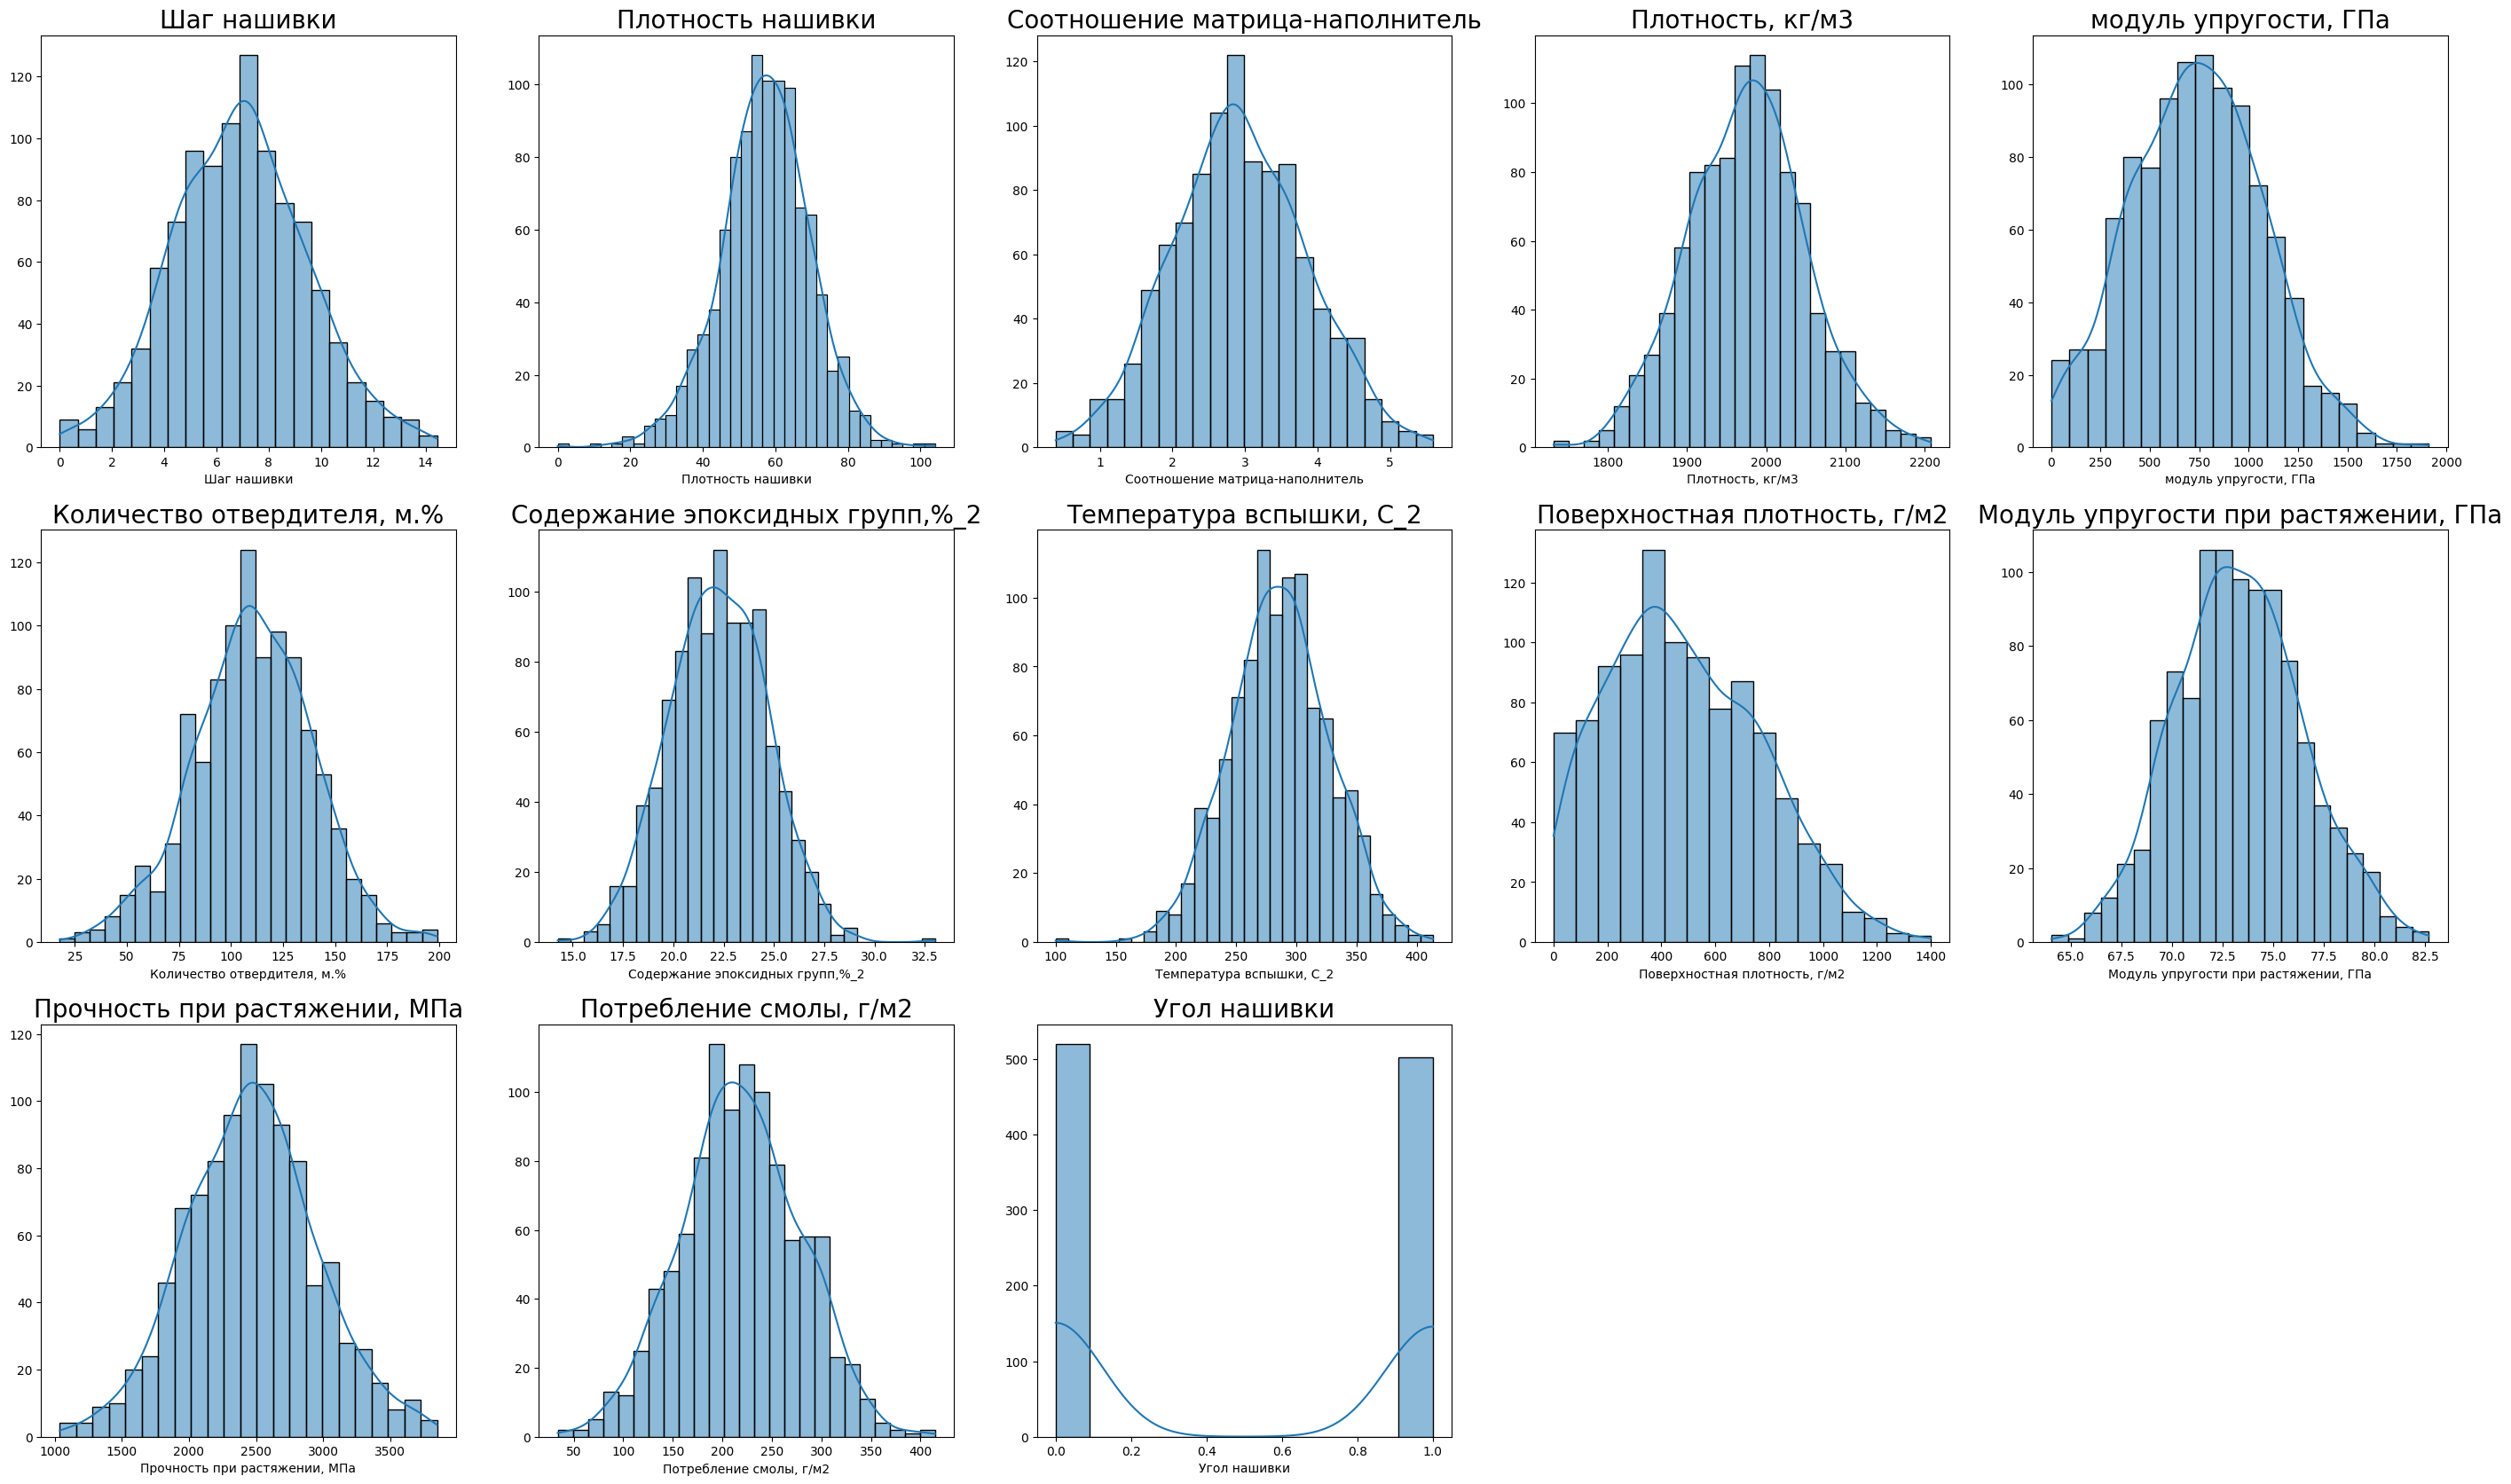

In [ ]:
a, b, c=5, 5, 1
plt.figure(figsize=(35,35))

for col in dfnew.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = dfnew[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

In [ ]:
stats.shapiro(dfnew['Шаг нашивки'])  

ShapiroResult(statistic=0.9977383613586426, pvalue=0.17575937509536743)

In [ ]:
# проверка данных на нормальное распределние по критерию Шапиро

accepted_list = []
rejected_list = []

for col in dfnew.columns:
    alpha = 0.05
    stat, p = stats.shapiro(df[col]) # Критерий согласия шапиро
    #print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print(f'Наименование колонок с данными С нормальным распределением: {accepted_list}')
print(f'Наименование колонок с данными БЕЗ нормального распределения : {rejected_list}')

Наименование колонок с данными С нормальным распределением: ['Шаг нашивки', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']
Наименование колонок с данными БЕЗ нормального распределения : ['Плотность нашивки', 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Угол нашивки']


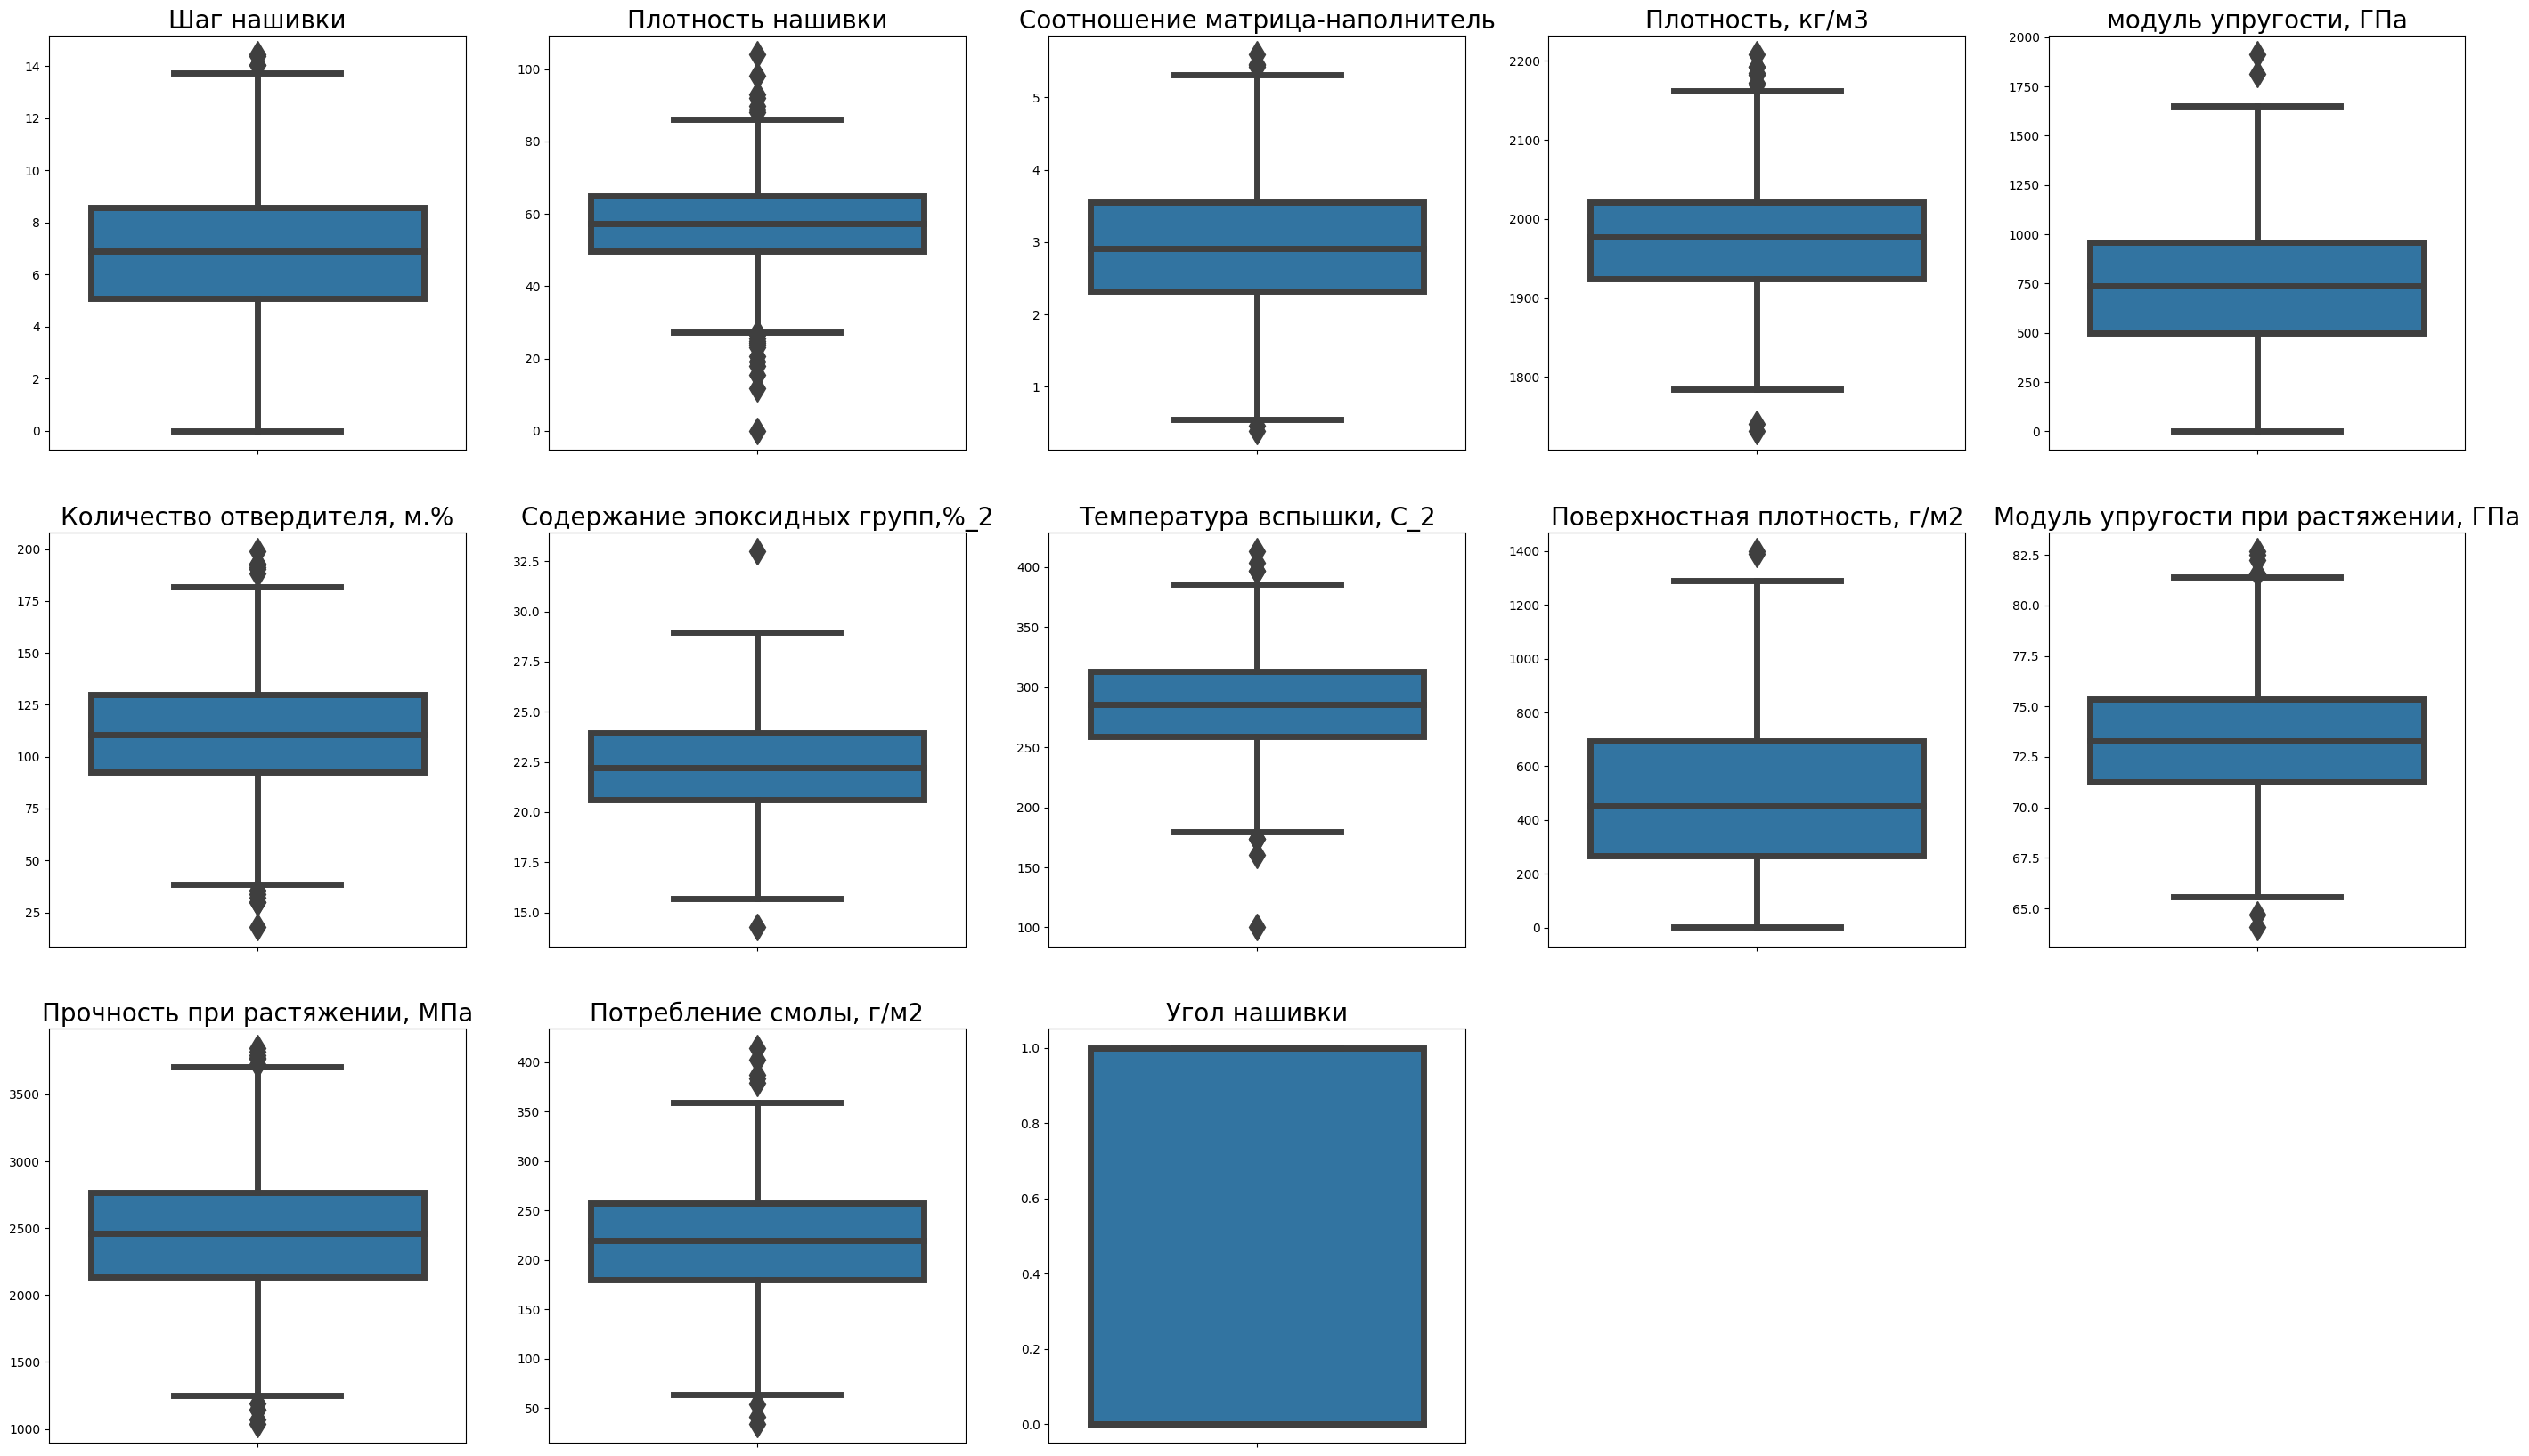

In [ ]:
# бохплот, ящик с усами
a, b, c=5, 5, 1
plt.figure(figsize=(35,35))

for col in dfnew.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = dfnew, y=dfnew[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

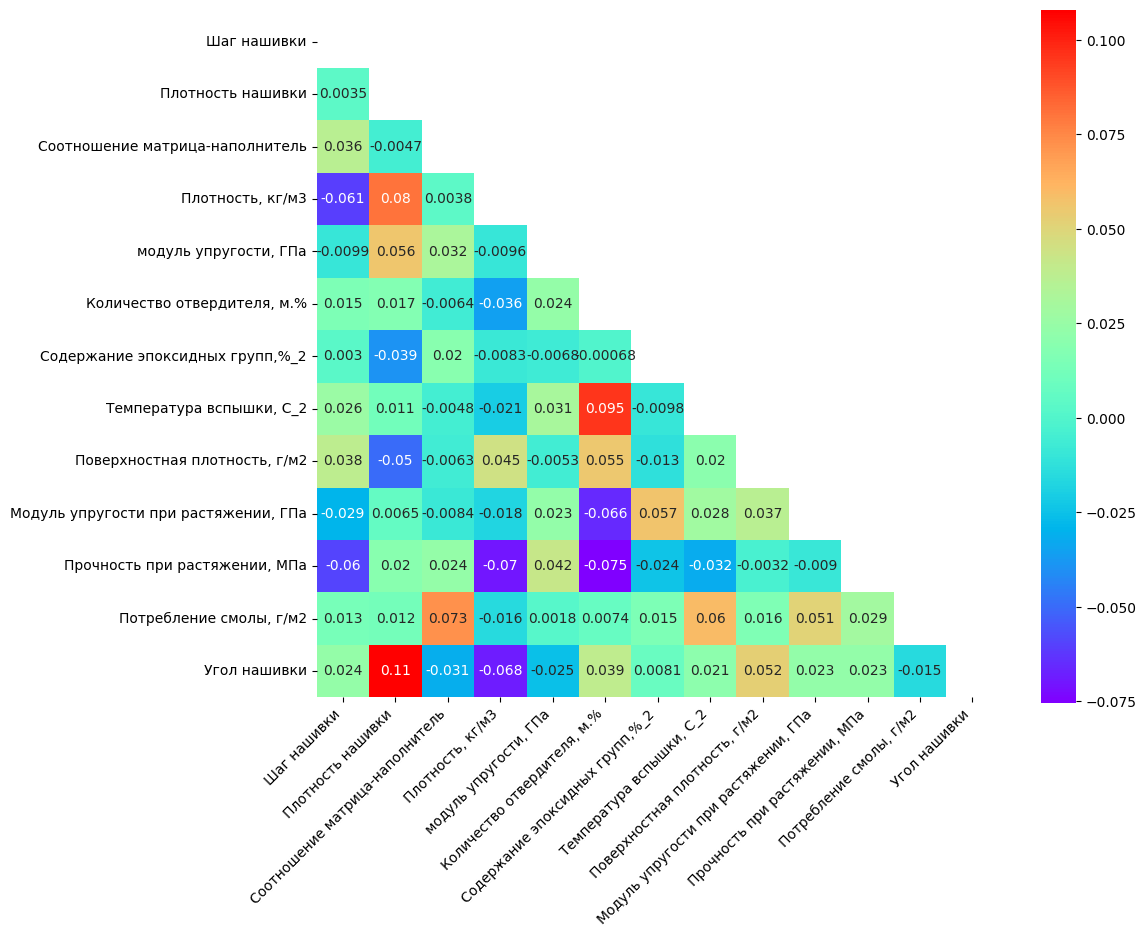

In [ ]:
#тепловая карта корреляционных связей между показателями
mask = np.triu(dfnew.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dfnew.corr(), mask=mask, annot=True, square=True, cmap='rainbow')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#работа с выбросами

по графикам бохплот видно, что все столбцы (кроме угла нашивки) имеют выбросы.
Удалим выбросы методом межвартильного размаха.
операцию повторяем до тех пор, пока на графиках (ящик с усами) не будут отсутствовать выбросы.


In [ ]:
for col in dfnew.columns:
    q75,q25 = np.percentile(dfnew.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dfnew.loc[dfnew[col] < min,col] = np.nan
    dfnew.loc[dfnew[col] > max,col] = np.nan

In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Шаг нашивки                           1019 non-null   float64
 1   Плотность нашивки                     1002 non-null   float64
 2   Соотношение матрица-наполнитель       1017 non-null   float64
 3   Плотность, кг/м3                      1014 non-null   float64
 4   модуль упругости, ГПа                 1021 non-null   float64
 5   Количество отвердителя, м.%           1009 non-null   float64
 6   Содержание эпоксидных групп,%_2       1021 non-null   float64
 7   Температура вспышки, С_2              1015 non-null   float64
 8   Поверхностная плотность, г/м2         1021 non-null   float64
 9   Модуль упругости при растяжении, ГПа  1017 non-null   float64
 10  Прочность при растяжении, МПа         1012 non-null   float64
 11  Потребление смолы

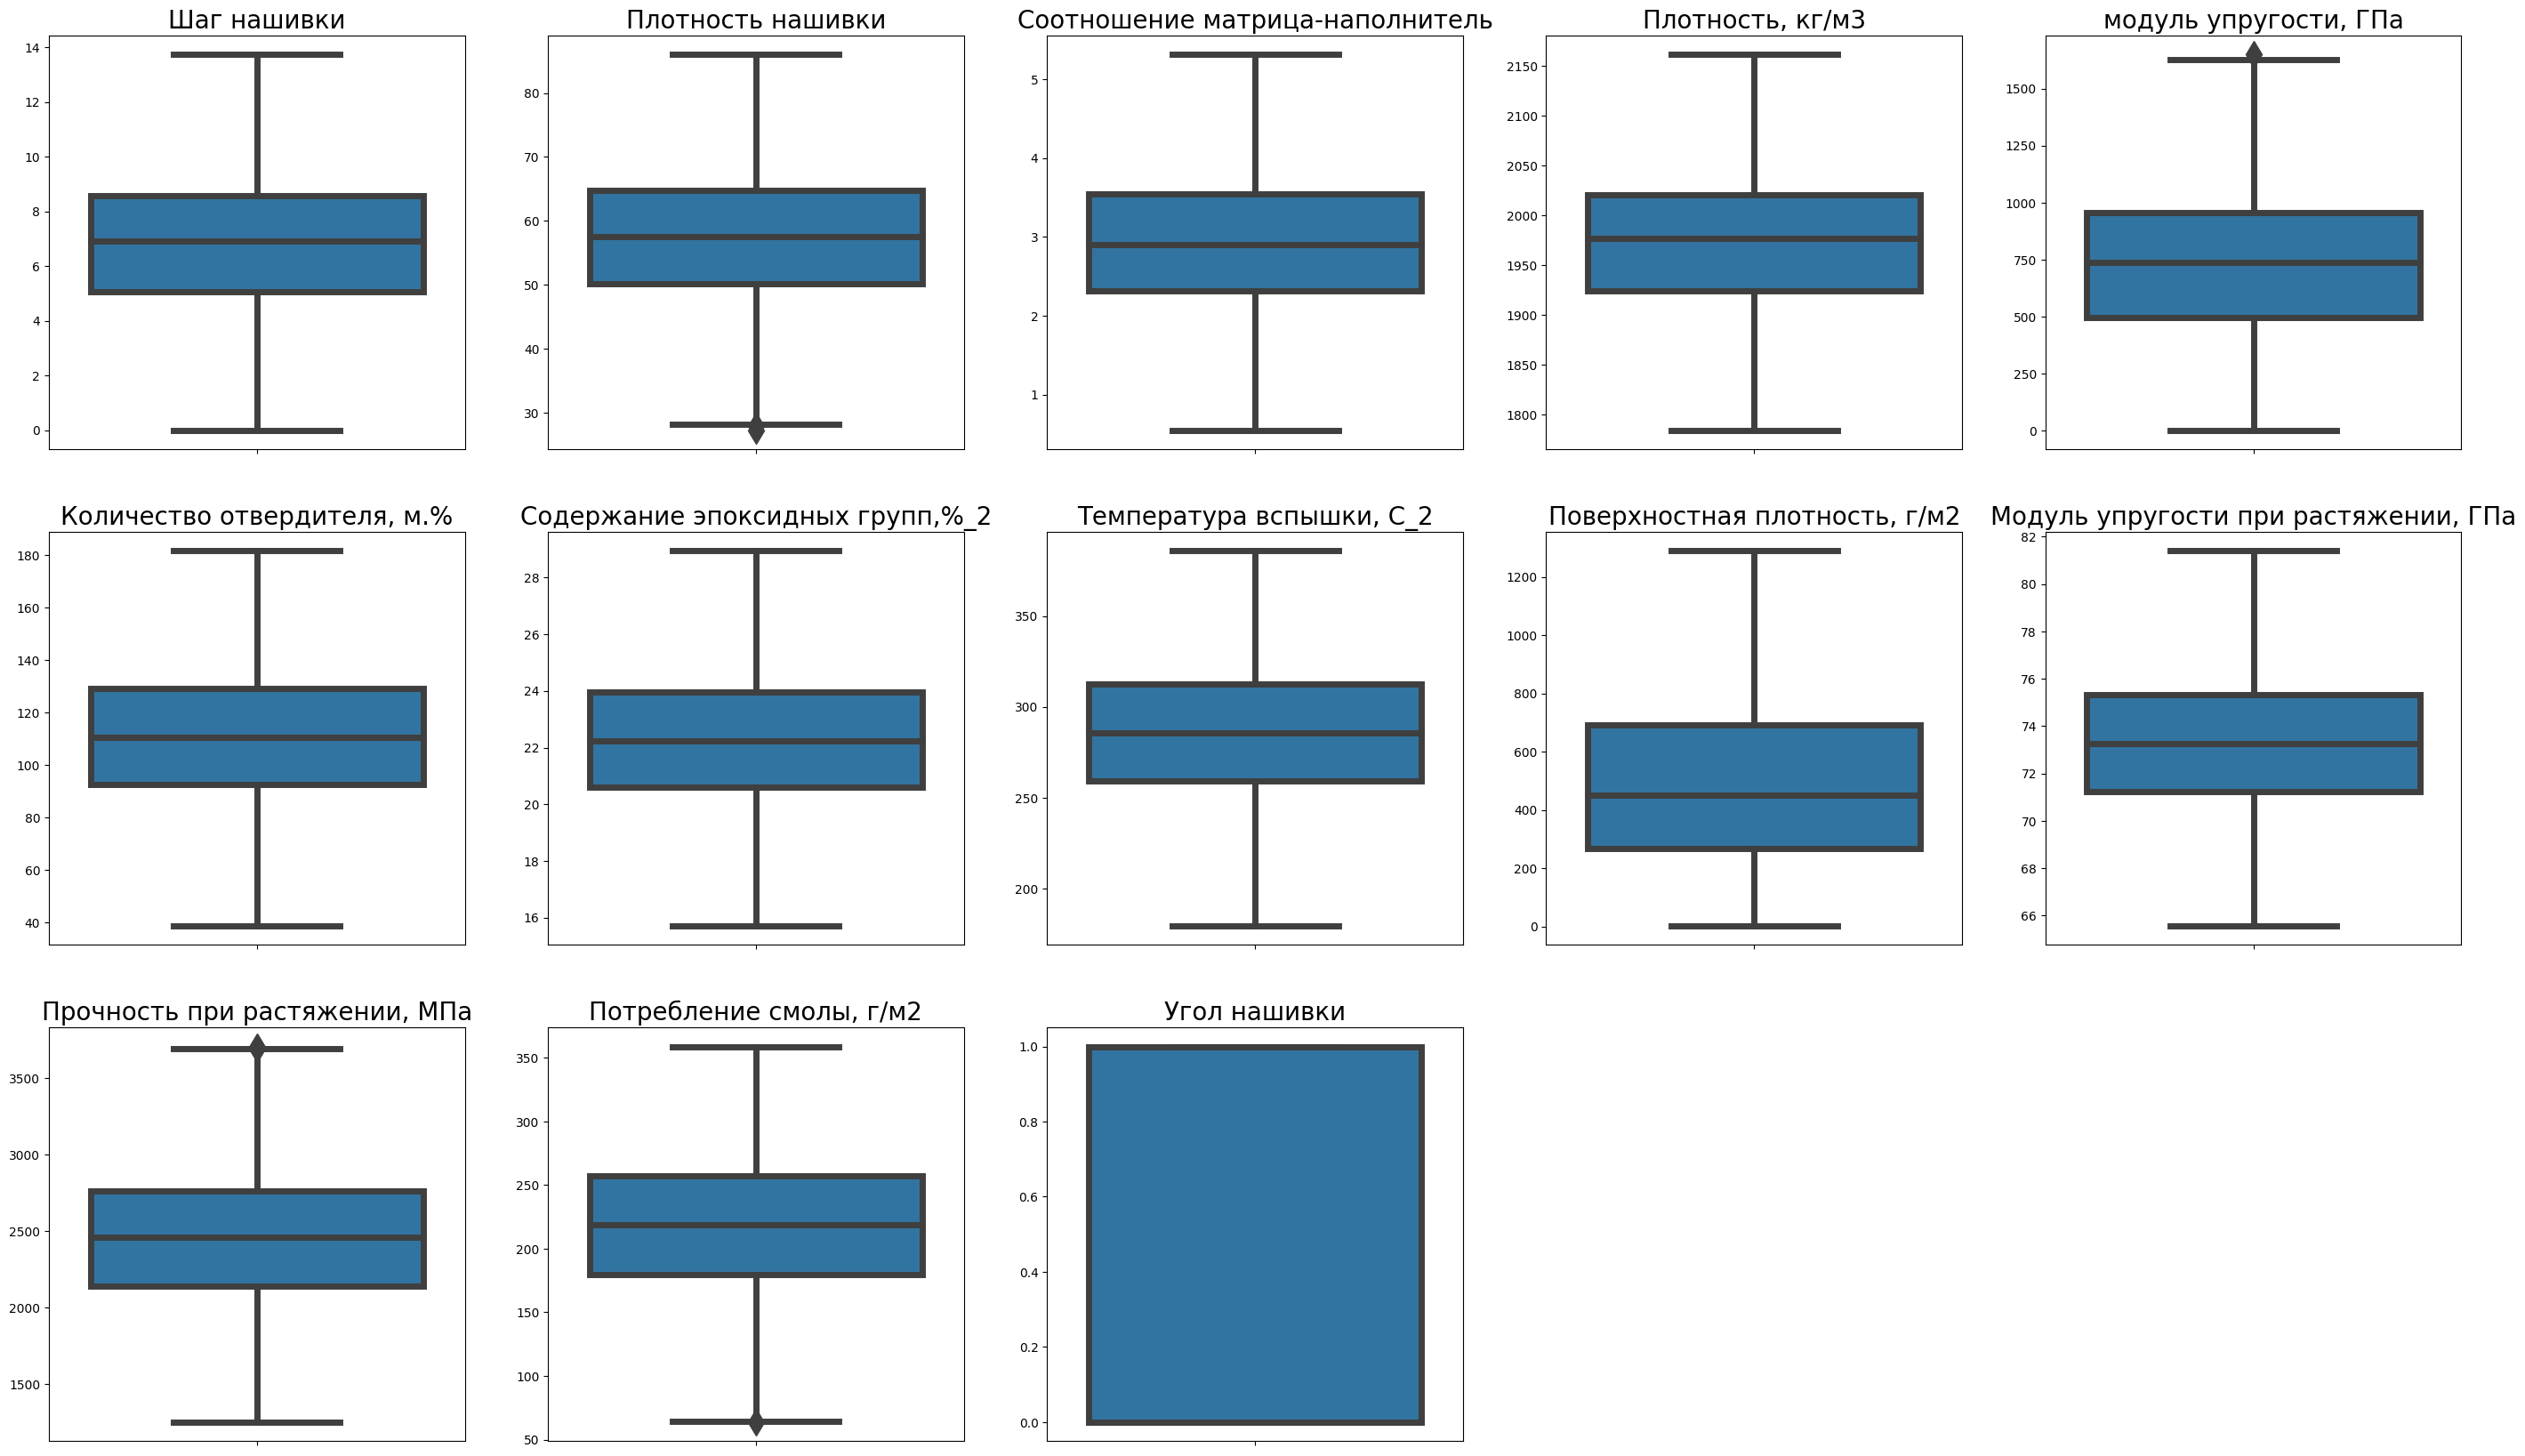

In [ ]:
# бохплот, ящик с усами
a, b, c=5, 5, 1
plt.figure(figsize=(35,35))

for col in dfnew.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = dfnew, y=dfnew[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

In [ ]:
dfnew = dfnew.dropna(axis=0)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Шаг нашивки                           936 non-null    float64
 1   Плотность нашивки                     936 non-null    float64
 2   Соотношение матрица-наполнитель       936 non-null    float64
 3   Плотность, кг/м3                      936 non-null    float64
 4   модуль упругости, ГПа                 936 non-null    float64
 5   Количество отвердителя, м.%           936 non-null    float64
 6   Содержание эпоксидных групп,%_2       936 non-null    float64
 7   Температура вспышки, С_2              936 non-null    float64
 8   Поверхностная плотность, г/м2         936 non-null    float64
 9   Модуль упругости при растяжении, ГПа  936 non-null    float64
 10  Прочность при растяжении, МПа         936 non-null    float64
 11  Потребление смолы,